In [2]:
%cd drive/MyDrive/Extract_text_project/document_scanner/

/content/drive/MyDrive/Extract_text_project/document_scanner


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

In [4]:
img_orig = cv2.imread('./images/03.jpg')

In [6]:
 from google.colab.patches import cv2_imshow

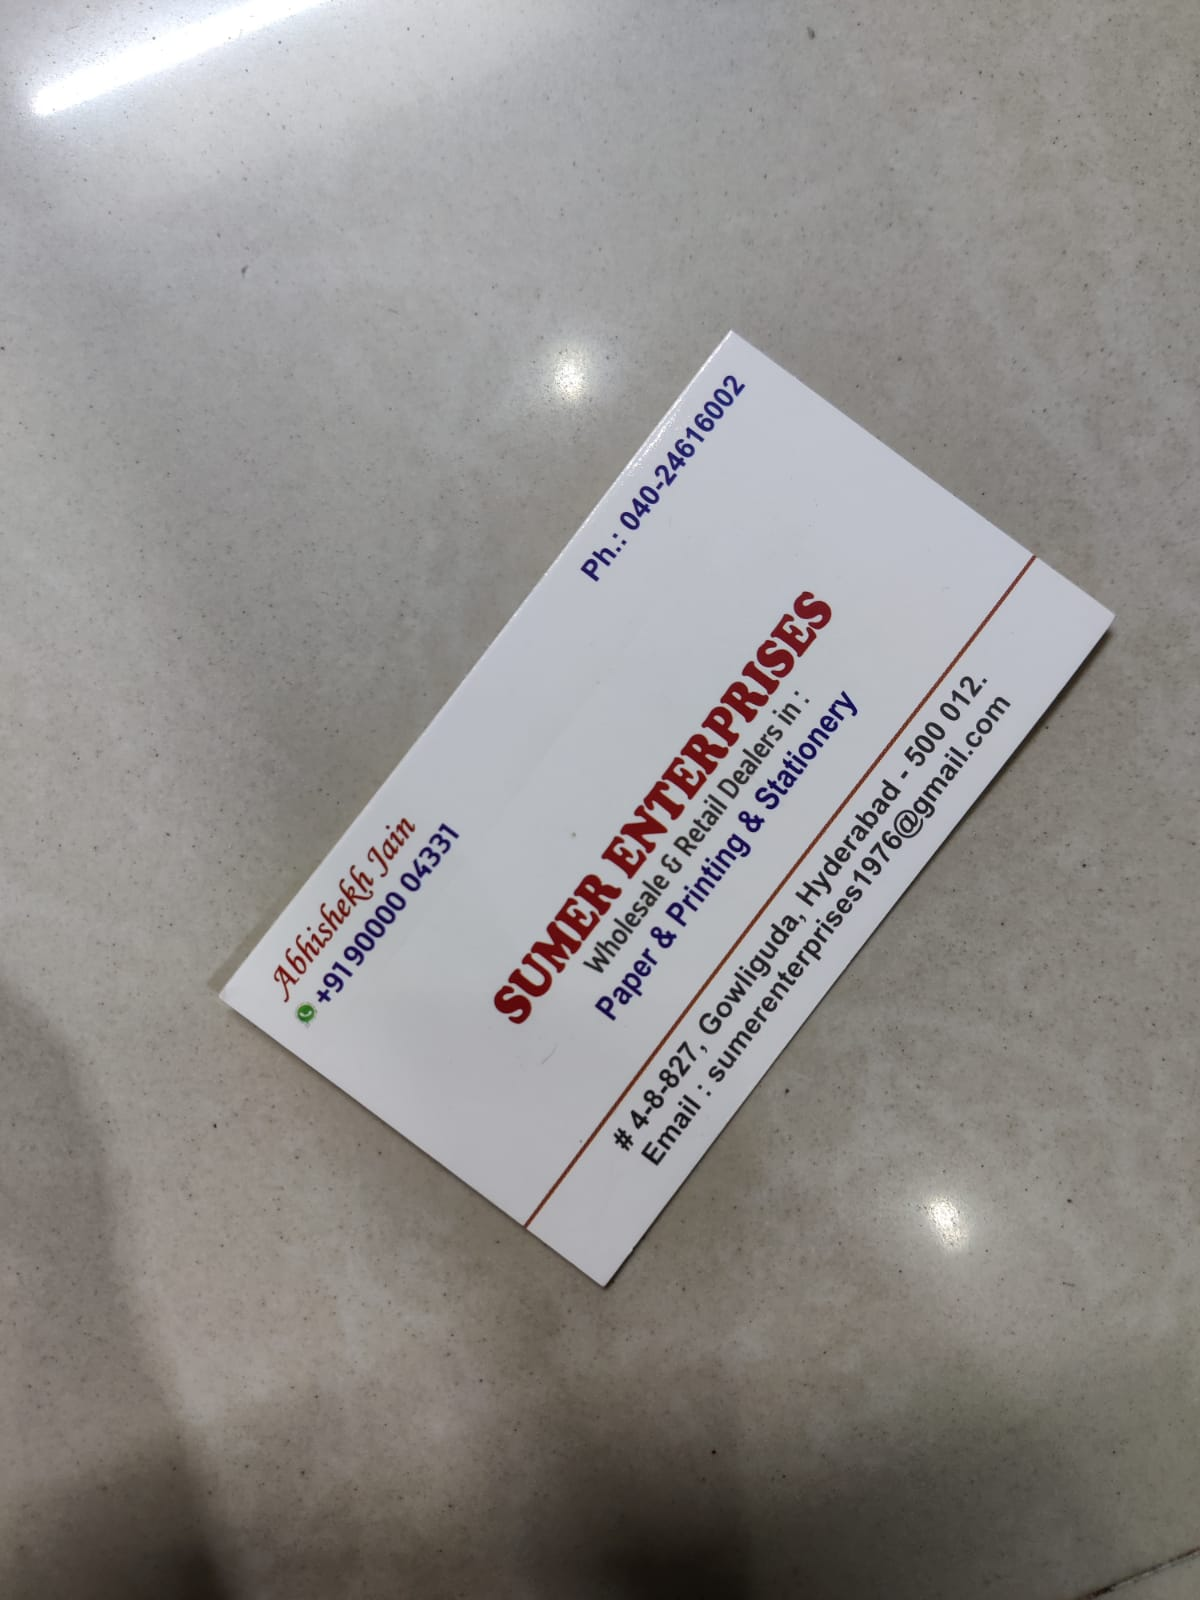

In [7]:
cv2_imshow(img_orig)

Scanning

1. Resize the images and set its aspect ratio

In [8]:
def resizer(image,width=500):
    # get widht and height
    h,w,c = image.shape
    
    height = int((h/w)* width )
    size = (width,height)
    image = cv2.resize(image,(width,height))
    return image, size

(500, 666)


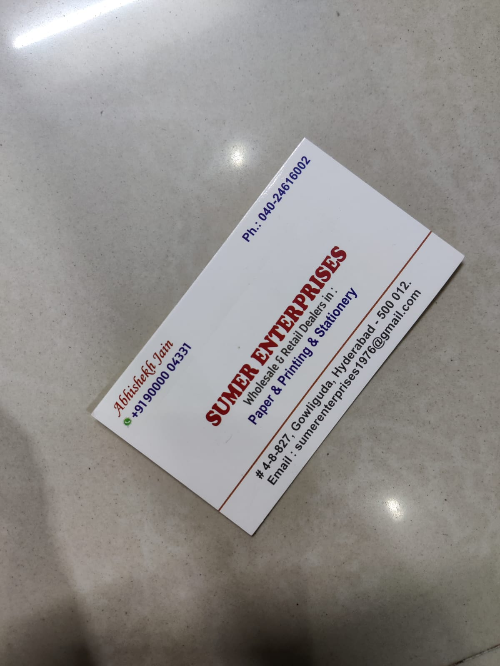

In [9]:
img_re,size = resizer(img_orig)
print(size)
cv2_imshow(img_re)


#### 2. Image Processing
1. Enhance
2. Grayscale
3. Blur
4. Edge Detect
5. Morphological transform
6. Countors
7. Find Four Points

In [10]:
detail = cv2.detailEnhance(img_re,sigma_s = 20, sigma_r = 0.15)
gray = cv2.cvtColor(detail,cv2.COLOR_BGR2GRAY) # GRAYSCALE IMAGE
blur = cv2.GaussianBlur(gray,(5,5),0)
# edge detect
edge_image = cv2.Canny(blur,75,200)
# morphological transform
kernel = np.ones((5,5),np.uint8)
dilate = cv2.dilate(edge_image,kernel,iterations=1)
closing = cv2.morphologyEx(dilate,cv2.MORPH_CLOSE,kernel)

# find the contours
contours , hire = cv2.findContours(closing,
                                   cv2.RETR_LIST,
                                   cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)
for contour in contours:
    peri = cv2.arcLength(contour,True)
    approx = cv2.approxPolyDP(contour,0.02*peri, True)
    
    if len(approx) == 4:
        four_points = np.squeeze(approx)
        break
        
cv2.drawContours(img_re,[four_points],-1,(0,255,0),3)

# find four points for original image
multiplier = img_orig.shape[1] / size[0]
four_points_orig = four_points * multiplier
four_points_orig = four_points_orig.astype(int)

In [11]:
from imutils.perspective import four_point_transform

In [12]:
wrap_image = four_point_transform(img_orig,four_points_orig)

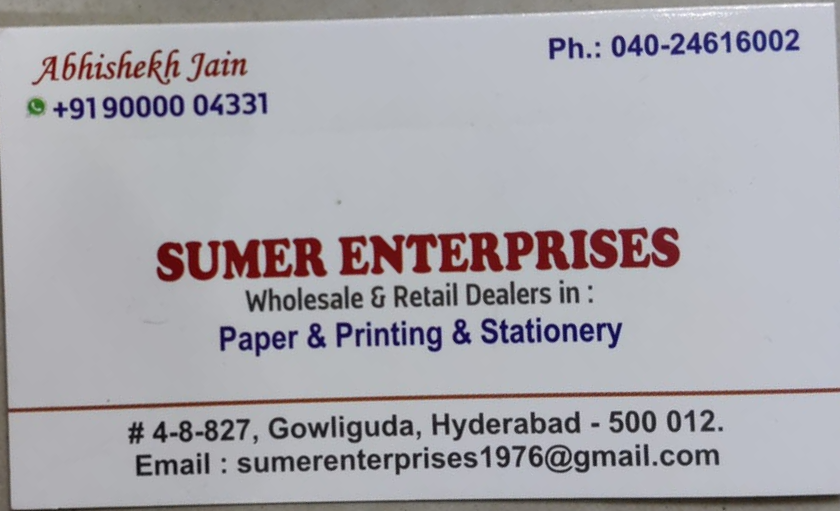

In [13]:
cv2_imshow(wrap_image)

Document Scanner Function

In [14]:
def document_scanner(image):

    img_re,size = resizer(image)
    detail = cv2.detailEnhance(img_re,sigma_s = 20, sigma_r = 0.15)
    gray = cv2.cvtColor(detail,cv2.COLOR_BGR2GRAY) # GRAYSCALE IMAGE
    blur = cv2.GaussianBlur(gray,(5,5),0)
    # edge detect
    edge_image = cv2.Canny(blur,75,200)
    # morphological transform
    kernel = np.ones((5,5),np.uint8)
    dilate = cv2.dilate(edge_image,kernel,iterations=1)
    closing = cv2.morphologyEx(dilate,cv2.MORPH_CLOSE,kernel)

    # find the contours
    contours , hire = cv2.findContours(closing,
                                       cv2.RETR_LIST,
                                       cv2.CHAIN_APPROX_SIMPLE)

    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    for contour in contours:
        peri = cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour,0.02*peri, True)

        if len(approx) == 4:
            four_points = np.squeeze(approx)
            break

    cv2.drawContours(img_re,[four_points],-1,(0,255,0),3)

    # find four points for original image
    multiplier = image.shape[1] / size[0]
    four_points_orig = four_points * multiplier
    four_points_orig = four_points_orig.astype(int)

    wrap_image = four_point_transform(image,four_points_orig)
    
    return wrap_image, four_points_orig, img_re, closing

In [15]:
img = cv2.imread('./images/033.jpg')
wrpimg, points, cnt_img, edgeimg = document_scanner(img)

In [ ]:
cv2_imshow(img)
cv2_imshow(cnt_img)
cv2_imshow(edgeimg)
cv2_imshow(wrpimg)
